## 1 - Classification in brief

The most common supervised learning tasks are Regression (predicting values i.e quantitative variables) and Classification (predicting classes i.e factors, qualitative variables). In the last notebook, we used Regression models (`LinearRegression`, `DecisionTree`, `RandomForest`). Now we will work on a Classification project.

We will use the MNIST dataset which is a set of 70 000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. Our dependant variable is a qualitative variable with 9 levels --> 1,2,3,4,5,6,7,8,9. The variable may seem quantitative, but it is not. In fact try and imagine these numbers as not really numbers but just "names" or "labels". We could have done the same task but instead of the numbers as labels, we used "one", "two", "three","four"...  
<br/>
So our y/dependant variable is the labels. Our X variables are the pcitures of the handwritten image transformed into vectors. The model we are training will take as input a vector of numbers (that represent the handwritten image) and try to guess what number is written in the image.

### Code to download the MNIST  dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
# The variable we created "mnist" is a dictionary that has key-values pair; 
mnist.keys() # .keys() gives the keys of dictionaries

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The datasets that we generally load from sklearn have all the same structure (nearly):
- `data`: A matrix that contains n-columns and m-rows. The columns are the features(variables) and the rows the instances(observations)
- `DESCR`: Describes the data.
- `target`: Contains the labels(dependant variable)

### Create our X and y arrays

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape # We have 784 features and 70 000 instances. Every handwritten drawing is converted into a vector of 784 numbers.

# In fact, each image is 28 x 28 pixels which is equivalent de 784 features, each one representing 1 pixel's intensity
# from 0(white) to 255(black)

(70000, 784)

In [5]:
y.shape

(70000,)

#### Visualize the handwritten numbers

In order to visualize the numbers, we can represent in a graph the 784 data points and convert them to colours with matplotlib's `imshow` function.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.array(X) # Transform the pandas data frame into a numpy array to visualize
y = np.array(y)

print(f'The label of the first drawing is {y[0]}.') # What is the label of the drawing we will look at in a moment ?

some_digit = X[0] # we are taking all the features of the observation number 1 (1 is 0 in python)

# iloc is a pandas function that allow to localize using the index.

some_digit_image = some_digit.reshape(28,28) # X[0] is an array, vector of numbers; the real image is a 28 x 28 matrix; so

# we will reshape the vector into the matrix

The label of the first drawing is 5.


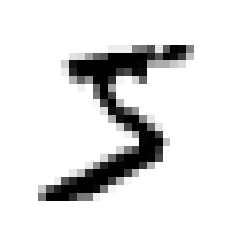

In [8]:
plt.imshow(some_digit_image, cmap = 'binary') # cmap means colour map --> colour map binary is black and white
plt.axis('off') # don't show the axis
plt.show()

We can see the power of python for visualization. With simple line of codes we could see a whole image. Now we know that the observation number 1 (0 in python) represents number 5. The question is now, how to create a machine learning model that will read this array of 784 numbers and decide that these number represent indeed a number 5. Espacially when we consider this is a handwritten number, meaning that there will be variations within the same number when written by different people.

#### Convert the label from string to number

The label column (y) is made of strings. Most ML algorithms love numbers, so let's convert the labels to integers.

In [9]:
y # we can see that the elements of the array are strings

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y = y.astype(np.uint8) # convert the type from object to uint8 (integers)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

#### An example of the dataset (and itscomplexity)

<img src="Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" width="600"/>

To conclude this first part of the notebook, classification is really a way of taking input (ex: images of handwritten digits) and **classifying** them into categories (ex: category 1: '1', category 2: '5' ...)

## 2- Training ML models

### Creating a test and training

Of course before any ML project we first need to divide our data in 2 parts: training and testing.

We are lucky because the MNIST dataset is already splitted for us in training and testing sets. The first 60 000 images are for training and the last 10 000 for testing.

In [11]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Training a Binary Classifier

Binary Classifiers are classifiers that predict only 2 groups; you are either 1 or 0.  
<br/>
An example of that would be to train a classifier that will only detect the number 5: the "5-detector" classifier.

In [12]:
# Let's create the target vectors
y_train_5 = (y_train == 5) # We will have Tue for all 5 and False if not a 5.
y_test_5 = (y_test == 5)

# A good practice is always to put these conditional statements between parentheses.

#### Stochastic Gradient Descent (SGD-Classifier)

We will pick `SGDClassifier` to start with. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd_clf = SGDClassifier(random_state = 42) # random_state is just so every time we run the notebook we get the same results
sgd_clf.fit(X_train,y_train_5) 

SGDClassifier(random_state=42)

**NB**: `SGDClassifier`relies on randomness during training $\rightarrow$; hence the name Stochastic; stochasticity being the lacking of any predictable order or plan. This is why we used random_state here. 

In [15]:
# Now we can use the classifier to detect the number 5.
sgd_clf.predict([some_digit]) # Remember that some_digit is X[0] that we say is number 5. Let's see if the classifier
# will correctly classify it.

array([ True])

Hurrah ! the classifier correctly classified our handwritten image.

## 3- Performance measure of the model

Now that we have a model, let's measure its performance with cross-valdiation.

In the previous notebook we saw how to use `cross_val_score` that is the very direct and easy way to implement cross validation. Let's try it with 3 folds. 3 folds means dividing the training set in 3 parts and then trying the model 3 times; training it on 2 folds and testing on the 3rd validation fold by changing after each iteration the validation fold; so that all folds are used 1 times as a validation fold.

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

What a beautiful score ! Above 95% of correct answers.

If it is too good to be true...IT IS TOO GOOD TO BE TRUE.  
<br/>
Look at that, we will create a very dumb classifier that will just **class every image as not being 5**. 

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype = bool) # Every time the classifier will say FALSE --> not a 5

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

Wait.. Wuut ??  
The super dumb classifier that always says not 5 has a 90-91% accuracy. How come ?  
<br/>
Well, in the original dataset we have 9 options (1 to 9). The number of 5s is around 10-11%. Therefore a classifier that only detects 5, if it says not 5 every time,  will only be mistaken around 10% of the trials and the accuracy will be at 90%.

This is an important lesson; it shows that when we deal with skewed data sets (meaning some classes are more frequent then others; like in our case where 90% were False and 10% True), the **accuracy** is not a good performance measure.

#### Advanced cross valdiation

In the previous example we used the very direct and easy `cross_val_score`. However, sometimes we need more control over the cross validation. In these cases, we can adapt cross_val_score to fit our needs.

By default cross_val_score uses `StratifiedKFold`. Other cross validations exist namely `KFold` , `LeaveOneOut`, `ShuffleSplit`, `GroupKFold`.

The idea would be to create a variable called **cv** and then input it in `cross_val_score`.

In [19]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, GroupKFold

cv = KFold(5)
cross_val_score(sgd_clf,X_train,y_train_5,cv=cv)

array([0.95316667, 0.96283333, 0.95116667, 0.96691667, 0.96291667])

We won't go into details here, but we just wanted to expose the method so you can use it in your project. You can research these cross-val methods and implement them accordingly if and when needed.

### Confusion matrix

The confusion matrix is very useful and it tells us how many of "A" were classified as "A" and how many as "B". Same for "B".
<br/>
This is a much better way to evaluate the performance of a classifier.

To compute the confusion matrix we first need to have a set of predictions so that they can be compared to the actual targets. We could predict on the test set; but remember, ideally we want to keep the test set for the very end.

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## This function will perform cross validation as before but return the predicted values on the validation sets.
## These are "clean" predictions because model never saw or is trained on the validation sets. 
## If we put together all the predictions made on the validation sets, we get y_pred for all our training data;
##### because every fold (subset) will become for one iteration a validation set.

In [22]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in the confusion matrix represent an actual class, while each column represent a predicted class.  
<br/>
The first row of this matrix considers non-5 images (False class) $\rightarrow$ 53892 of them were correctly classified (**True Negatives**) and 687 wrong (**False Positives**).  
<br/>
The second row considers the yes-5 images (True class) $\rightarrow$ 1891 were falsely classified (**False Negatives**) and 3530 were correct (**True Positives**).

**NB**: A perfect prediction would make a confusion matrix with only True Positives and True Negatives. It would have non zeros only on the main diagonal.

#### Accuracy of the positive predictions (Precision)

A measure based on the confusion matrix is the accuracy of the positive predictions called **percision** $\rightarrpw$ positive detected / every positive classification

precision = $\frac {TP}{TP + FP}$

#### True positive rate

Precision is usually used with the measure of **sensitivity** or **true positive rate** $\rightarrow$ this is the ratio of positive instances that are correctly detected by the classifier $\rightarrow$ positive detected / positive total.

sensitivity = $\frac{TP}{TP+FN}$

In [23]:
# Precision and sensitivity (also called Recall)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [24]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

Now our 5-detector does not look as good as with the 0.96 accuracy !

**Interpretation of scores**:   
- When the model claims the image is a 5, it is correct 84% of the time.  
- The model detects only 65% of the 5.

It is convenient to combine the precision and recall in one metric called the $F_1$ score. In particular if we need a simple way to compare 2 classification models.

This score is the *harmonic mean* of precision and recall. The regular mean treats all values equally, the harmonic mean gives more weight to low values. As a result, a classifier will only get a high $F_1$ score if both recall and precision are high.

F1 = $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

This score favors classifiers that have similar precision and recall. This is not always what we want: in some contexts we mostly care about precision and in others about recall.  
<br/>
We can't have it both ways, increasing precision reduces recall and vice versa.  
<br/>
**precision**: When the model claims its positive, it is correct x% of the time.  
**recall**: The model detects x% of the positive.  
<br/>
So we can augment the recall by labeling more observations as positive. It will probably augment the detection of positives but it will reduce the % of correct positives. It will label more of the negatives as positives.

### Precision/Recall trade-off

Precision and recall are inversely related. Lowering recall will increase precision and lowering precision will increase recall.  
Most classification models (like SGDClassifier) will choose a certain threshold value. They will then assign to each instance a value. If the value is lower than the threshold the instance will be classified in one group, and if higher in the other.  
<br/>
Therefore we can change precision and recall by changing the threshold value.

#### Chaning the threshold

Scikit-learn does not let us change the threshold directly, but it give us access to the decision scores that are used to make predictions. All we need to do is call the `decision_function()` method instead of `predict()` which returns a score for each instance, and then we can use any threshold we want to make predictions based on those scores.

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [27]:
threshold = 0 # Specify the threshold
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the `predict()` method. We can do the same with another threshold.

Raising the threshold will decrease the recall. The image we have just classified is a 5 and it was classified correctly. By raising the threshold we can see how this same image will be classified incorrectly.  
<br/>
**raising threshold $\rightarrow$ the model even though some images are in reality 5, will not detect them $\rightarrow$ reduce recall**  
<br/>
**raising threshold $\rightarrow$ when the model will predict 5, it will make less mistakes $\rightarrow$ increase precision**

In [28]:
# Increase the threshold
threshold = 8000 # Specify the threshold
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

How to decide which threshold to use? First we can use `cross_val_predict()` function to get the scores of all instances in the training set but this time specify that we want to return decision scores instead of predictions.

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

Now that we have these scores we can use the `precision_recall_curve()` function to compute precision and recall for all possible thresholds.

In [36]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

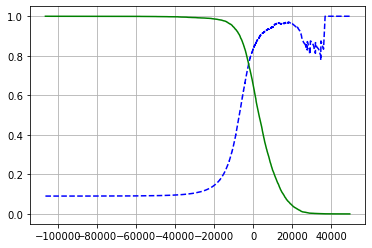

In [47]:
# Finally let's plot the precision and recall as functions of the threshold value

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--', label = 'Precision')
    plt.plot(thresholds,recalls[:-1],'g-', label = 'Recall')
    
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

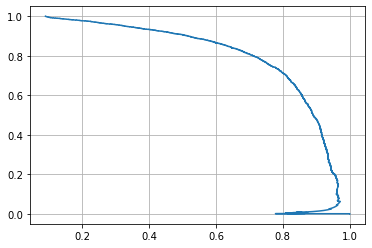

In [61]:
# We can also plot precision vs recall
plt.plot(precisions,recalls)
plt.grid()
plt.show()

In [64]:
# To precisely select a threshold.
## Suppose we want to aim for 90% precision.

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143957